## Sinais e Sistemas Dinâmicos - Projeto final
### Samuel Pordeus - 11400947
### Elcius Ferreira - 11400968

Importando os módulos necessários

In [1]:
import scipy.io.wavfile
import pydub
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab
import pylab as pl
from pydub import AudioSegment
from pydub.playback import play

%matplotlib inline

Abaixo importamos a música que vai ser processada pelo programa utilizando o módulo SciPy:


In [2]:
rate,audData=scipy.io.wavfile.read("wav/nirvana.wav")

Checando o tamanho da música em segundos:

In [3]:
length = audData.shape[0] / rate
length

225.69795918367348

Aqui temos de separar a música em dois canais, pois ela é Stereo. Optamos por não transformar em Mono pois ao tentar fazer isso manualmente utilizando a SciPy acontece um grande dano ao arquivo de som.

In [4]:
channel1=audData[:,0] #left
channel2=audData[:,1] #right

Checando algumas propriedades do arquivo de som:

In [5]:
audData.dtype

dtype('int16')

In [6]:
#Energy
np.sum(channel1.astype(float)**2)

50712767452163.0

### Amplitude de som vs Tempo

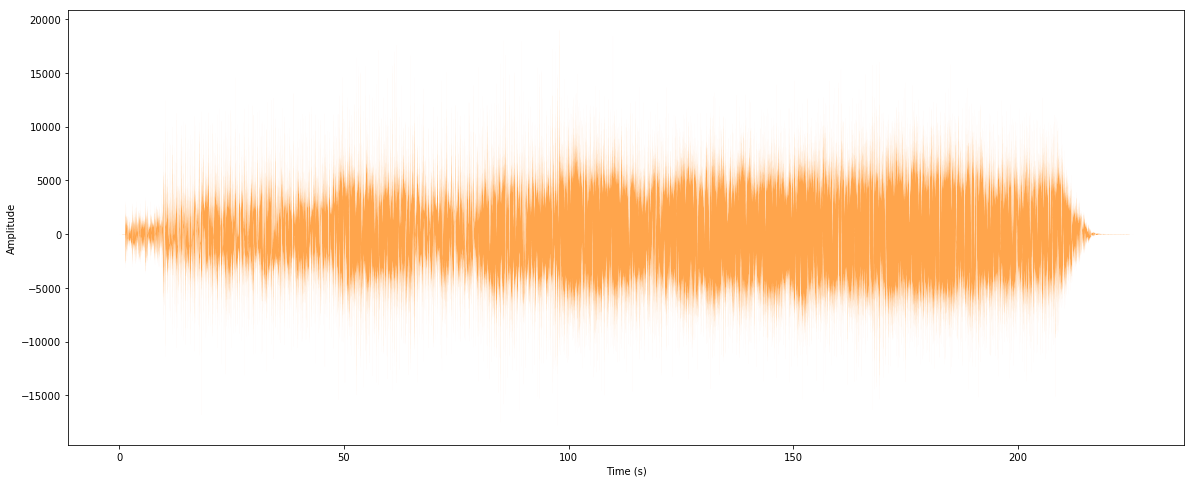

In [7]:
#create a time variable in seconds
time = np.arange(0, float(audData.shape[0]), 1) / rate

#plot amplitude (or loudness) over time
plt.figure(1, figsize=(20,8))
plt.plot(time, channel1, linewidth=0.01, alpha=0.7, color='#ff7f00')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Utilizando a fast fourier transform no arquivo de som

/home/samuelspordeus/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


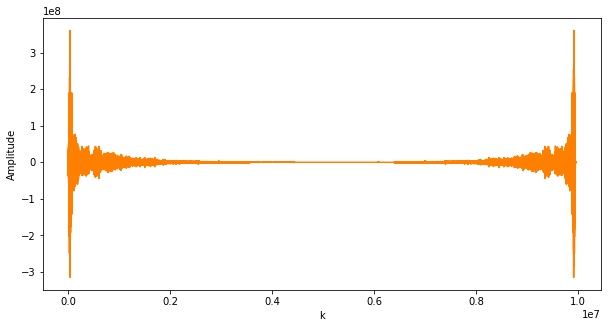

In [8]:
from numpy import fft as fft

fourier=fft.fft(channel1)

plt.figure(1, figsize=(10,5))
plt.plot(fourier, color='#ff7f00')
plt.xlabel('k')
plt.ylabel('Amplitude')

# Plotando dB vs kHz

/home/samuelspordeus/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


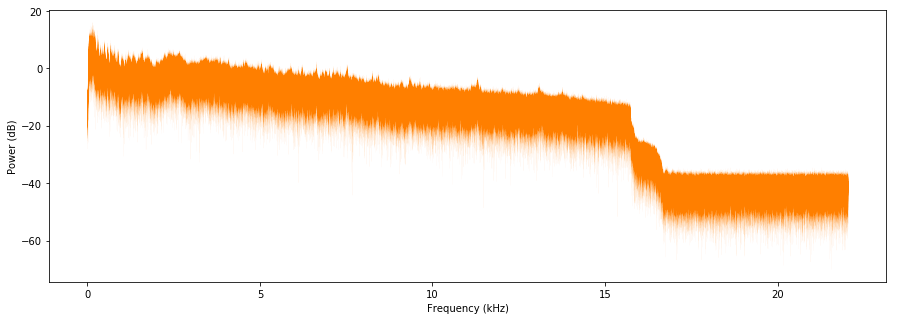

In [9]:
n = len(channel1)
fourier = fourier[0:int(n/2)]

# scale by the number of points so that the magnitude does not depend on the length
fourier = fourier / float(n)

#calculate the frequency at each point in Hz
freqArray = np.arange(0, (n/2), 1.0) * (rate*1.0/n);

plt.figure(1, figsize=(15,5))
plt.plot(freqArray/1000, 10*np.log10(fourier), color='#ff7f00', linewidth=0.02)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (dB)')

# Spectograma

/home/samuelspordeus/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7222: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


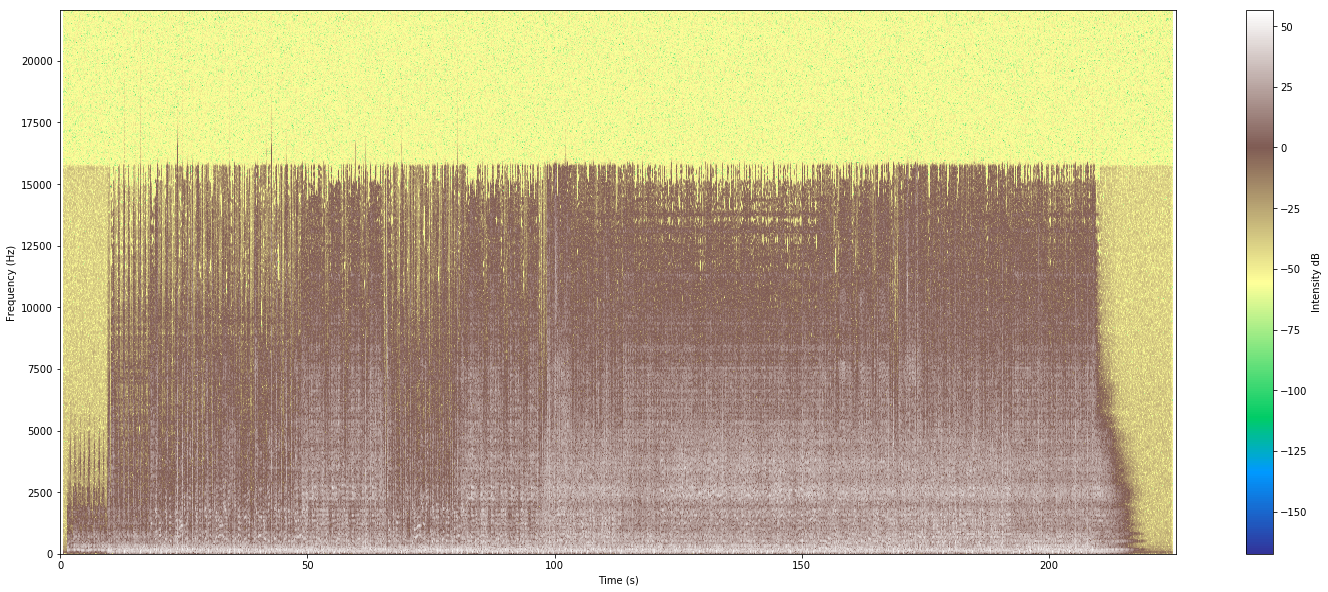

In [10]:
plt.figure(1, figsize=(25,10))
Pxx, freqs, bins, im = plt.specgram(channel1, Fs=rate, NFFT=1024, cmap=plt.get_cmap('terrain'), window=mlab.window_hanning)
cbar=plt.colorbar(im)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar.set_label('Intensity dB')
plt.savefig("/home/samuelspordeus/fft.pdf", dpi = 200)

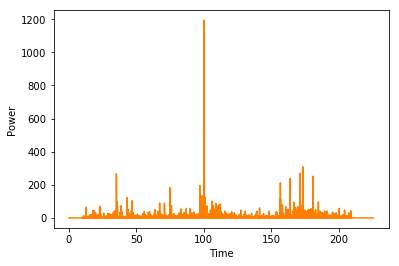

In [11]:
np.where(freqs==10034.47265625)
MHZ10=Pxx[233,:]
plt.xlabel('Time')
plt.ylabel('Power')
plt.plot(bins, MHZ10, color='#ff7f00')

* **Pxx** is the segments x freqs array of instantaneous power
* **freqs** is the frequency vector
* **bins** are the centers of the time bins in which the power is computed
* **im** is the matplotlib.image.AxesImage instance

# Próximos passos
* Descobrir como utilizar as variáveis: **Pxx**, **freqs** e **bins** para pegar apenas as faixas de frequência que queremos.
* Utilizar a fft invertida para cada trecho que separamos.
* Escrever um arquivo de aúdio novo para cada trecho que separamos.

In [12]:
def show_info(aname, a):
    print ("Array:", aname)
    print ("shape:", a.shape)
    print ("dtype:", a.dtype)
    print ("min, max:", a.min(), a.max())

In [13]:
freqs_cap = [x for x in freqs if x < 10000]

In [14]:
freqs_cap

[0.0,
 43.06640625,
 86.1328125,
 129.19921875,
 172.265625,
 215.33203125,
 258.3984375,
 301.46484375,
 344.53125,
 387.59765625,
 430.6640625,
 473.73046875,
 516.796875,
 559.86328125,
 602.9296875,
 645.99609375,
 689.0625,
 732.12890625,
 775.1953125,
 818.26171875,
 861.328125,
 904.39453125,
 947.4609375,
 990.52734375,
 1033.59375,
 1076.66015625,
 1119.7265625,
 1162.79296875,
 1205.859375,
 1248.92578125,
 1291.9921875,
 1335.05859375,
 1378.125,
 1421.19140625,
 1464.2578125,
 1507.32421875,
 1550.390625,
 1593.45703125,
 1636.5234375,
 1679.58984375,
 1722.65625,
 1765.72265625,
 1808.7890625,
 1851.85546875,
 1894.921875,
 1937.98828125,
 1981.0546875,
 2024.12109375,
 2067.1875,
 2110.25390625,
 2153.3203125,
 2196.38671875,
 2239.453125,
 2282.51953125,
 2325.5859375,
 2368.65234375,
 2411.71875,
 2454.78515625,
 2497.8515625,
 2540.91796875,
 2583.984375,
 2627.05078125,
 2670.1171875,
 2713.18359375,
 2756.25,
 2799.31640625,
 2842.3828125,
 2885.44921875,
 2928.51562